# INFO 659 Final Project - Increasing Bank Revenue  

## Introduction and Goal

Grace Sigalla (gas83@drexel.edu)<br>
Meznah Alsulami (mha54@drexel.edu)<br>
Ifeanyi Osuchukwu (imo27@drexel.edu)<br>
Christian Ekwomadu (cce49@drexel.edu)<br>

In [122]:
# !pip install dataprep
# !pip install pandas-profiling[notebook]
# !pip install mixed-naive-bayes
# !pip install scikit-plot

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix, roc_auc_score
from dataprep.eda import create_report
import scikitplot as skplt
from pandas_profiling import ProfileReport
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


In [128]:
df = pd.read_csv("new_train.csv")
# profile = ProfileReport(df, title="EDA of Bank Raw Data")
# profile.to_notebook_iframe()

### EDA

In [129]:
# profile = ProfileReport(df, title="Report")
# profile.to_file("EDA_Bank_Dataset.html")

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [130]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [163]:
# List of continous features
df.select_dtypes(exclude=['object']).columns.tolist() #

['age', 'duration', 'campaign', 'pdays', 'previous']

In [165]:
# List of catergorical features
df.select_dtypes(include=["object"]).columns.tolist()

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

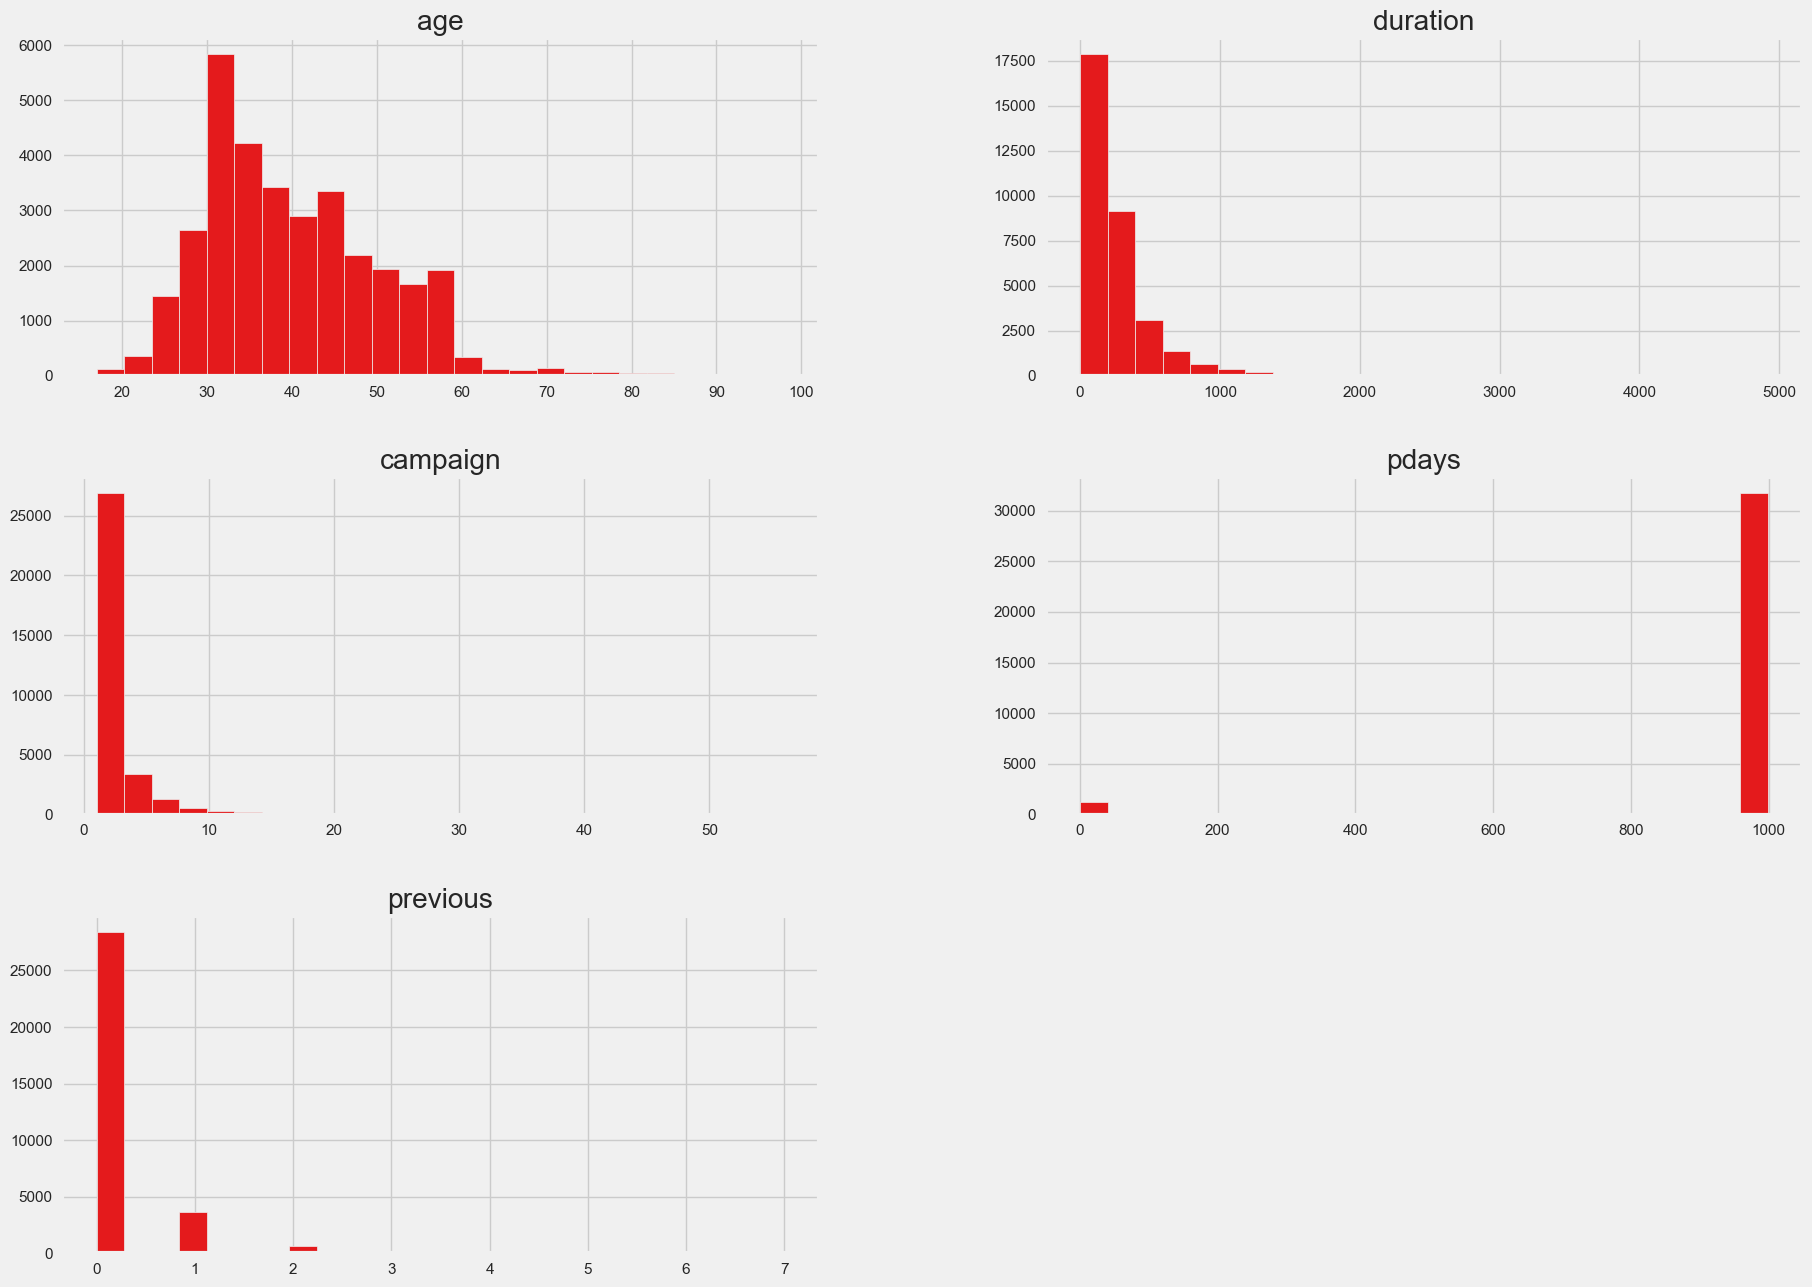

In [166]:
df.hist(bins=25, figsize=(20,15))
plt.show()

In [167]:
cat_var= df.select_dtypes(include= ["object"]).columns

### Bivarent Analysis

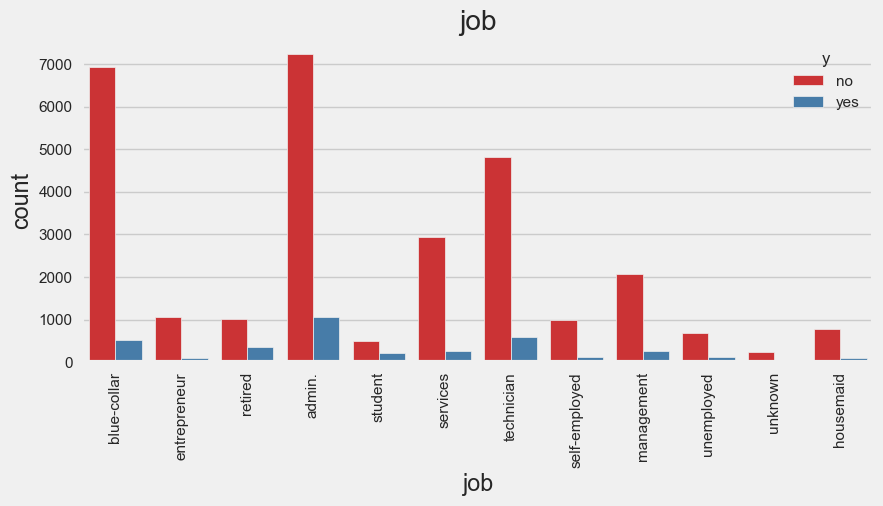

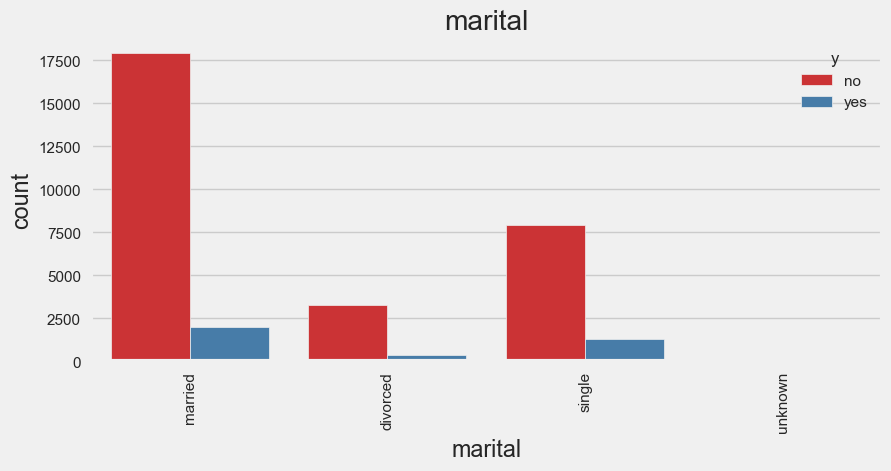

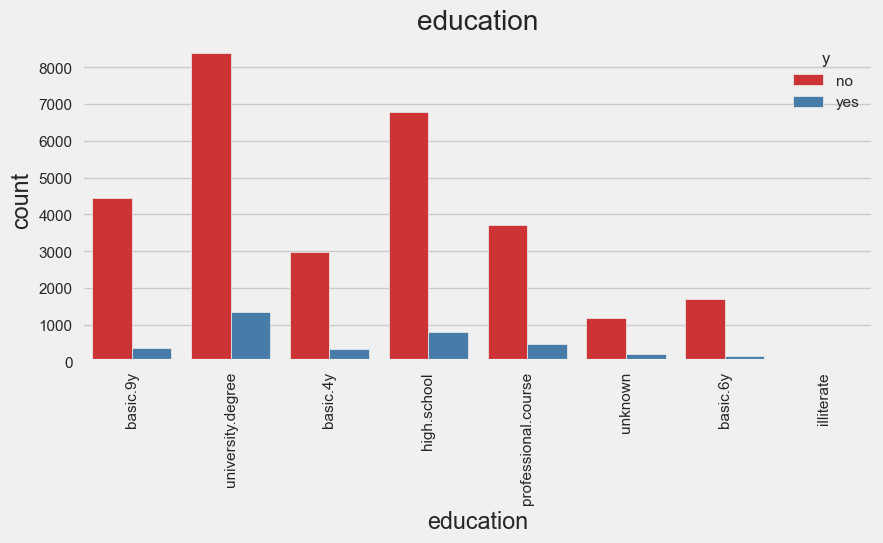

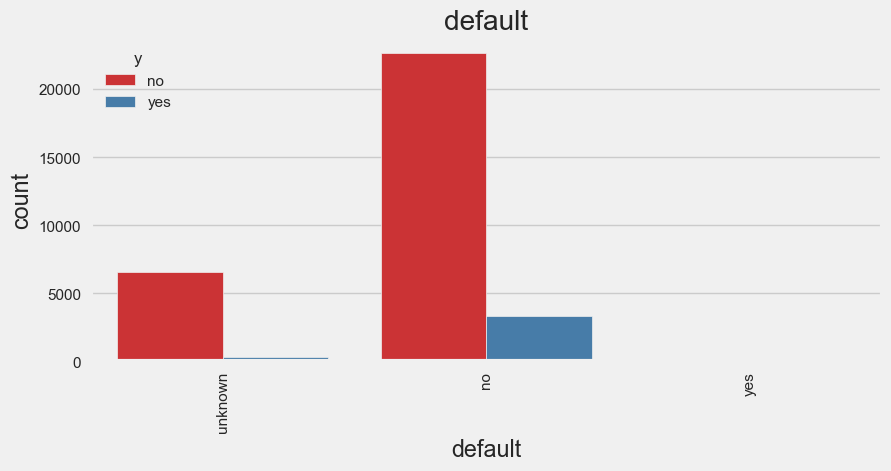

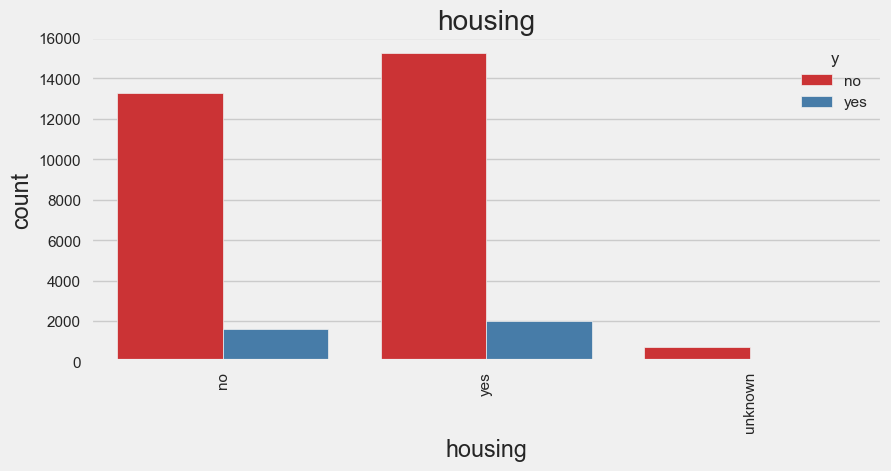

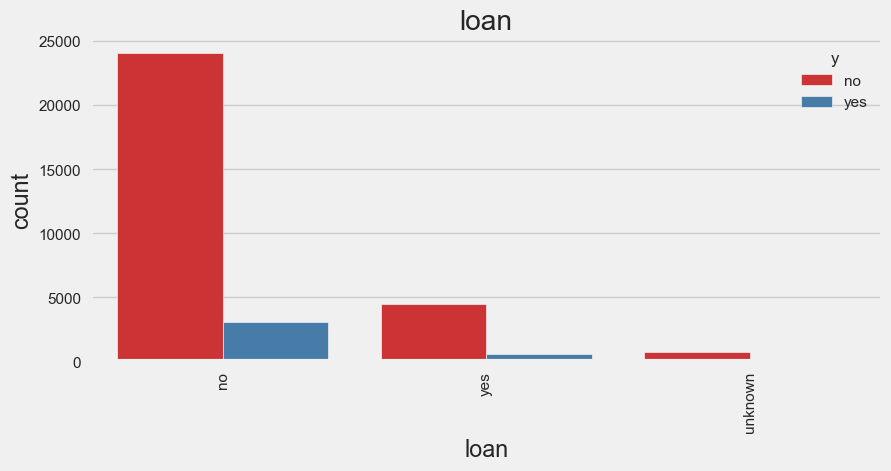

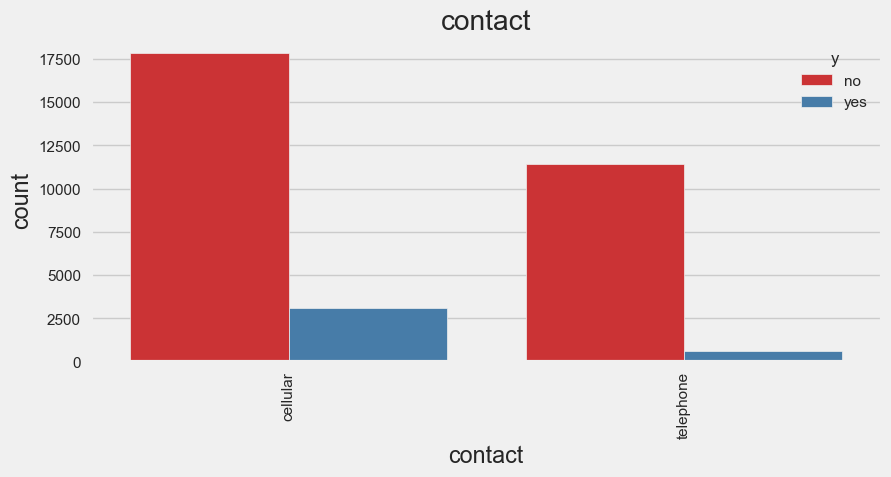

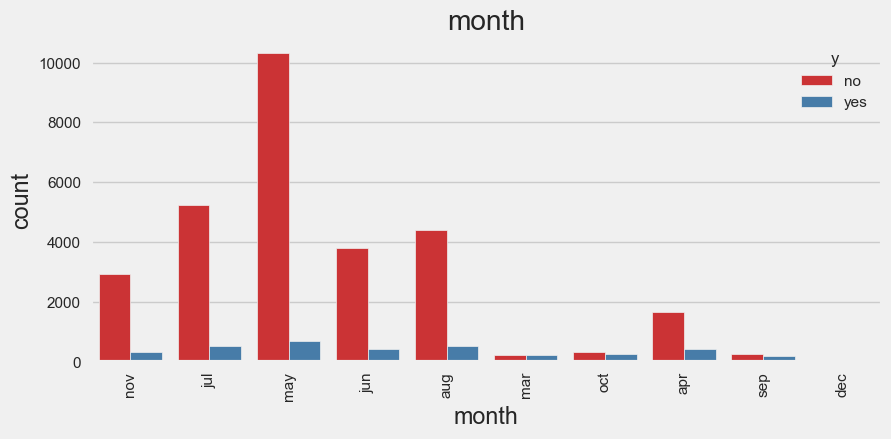

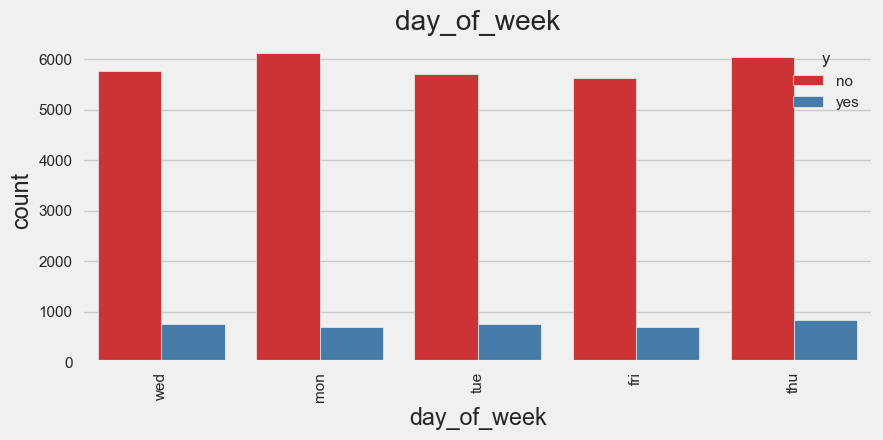

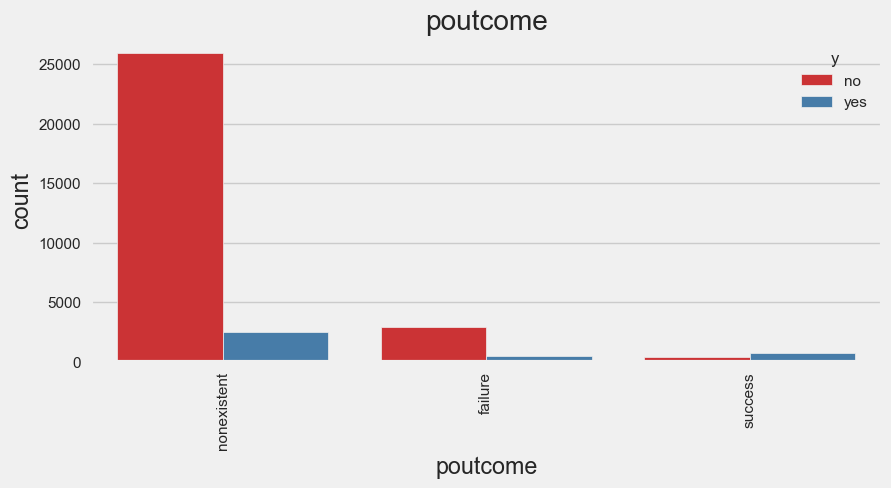

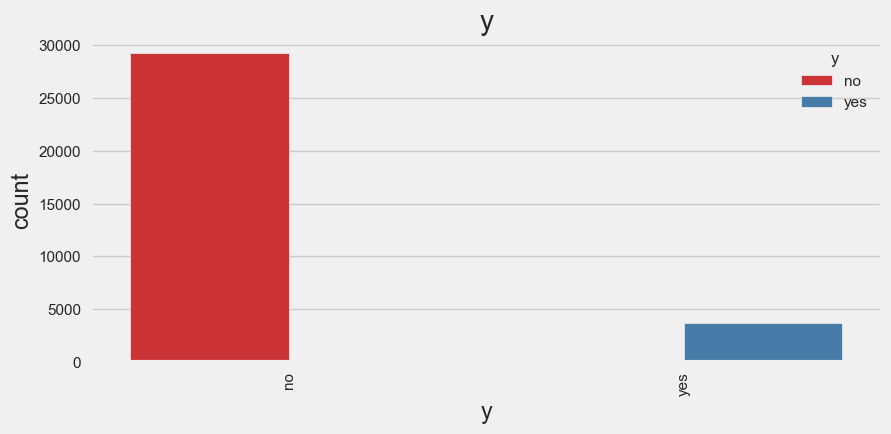

In [170]:
for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(df[column], hue=df["y"])
    plt.title(column)    
    plt.xticks(rotation=90)

### Data Cleansing and Model Preperation

In [132]:
#Dataset 
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [133]:
train_cat = list(X.select_dtypes(exclude = 'int').columns)  #  categorical column
train_int = list(X.select_dtypes(exclude = 'object').columns)  # numerical column

In [134]:
train_cat_pipe = Pipeline ( [ ('OneHotEncoder', OneHotEncoder(handle_unknown= 'ignore'))])
train_int_pipe = Pipeline( [ ('sc', StandardScaler())])

In [135]:
transformer = ColumnTransformer([
    ("train_cat_pipe", train_cat_pipe,train_cat),
    ("train_int_pipe",train_int_pipe,train_int)],
    remainder='drop'
    )

In [136]:
logistic_clf = Pipeline ( [ ('transformer', transformer),
                      ('lgr', LogisticRegression(random_state=42, max_iter=3000))
                      ])

svm_clf = Pipeline ( [('transformer', transformer),('svm', SVC(probability=True,kernel = 'linear'))])

random_forest_clf = Pipeline([('transformer', transformer), ('forest',RandomForestClassifier(random_state=42))])

# naive_bayes_clf = Pipeline([('transformer', transformer),('navie_bayes',MixedNB())])


### Split Dataset For Testing 

In [137]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.3, random_state= 42)

### Random Forest Machine Model 

In [138]:
random_forest_clf.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('train_cat_pipe',
                                                  Pipeline(steps=[('OneHotEncoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('train_int_pipe',
                                                  Pipeline(steps=[('sc',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                          

In [139]:
feature_names = random_forest_clf.feature_names_in_ 

In [140]:
coefs = random_forest_clf.named_steps['forest'].feature_importances_.flatten()

In [141]:
zipped = zip(feature_names, coefs)
df2= pd.DataFrame(zipped, columns=["feature", "value"])
# Sort the features by the absolute value of their coefficient
df2["abs_value"] = df2["value"].apply(lambda x: abs(x))
df2["colors"] = df2["value"].apply(lambda x: "green" if x > 0 else "red")
df2 = df2.sort_values("abs_value", ascending=False)

Text(0.5, 0, 'Feature Name')

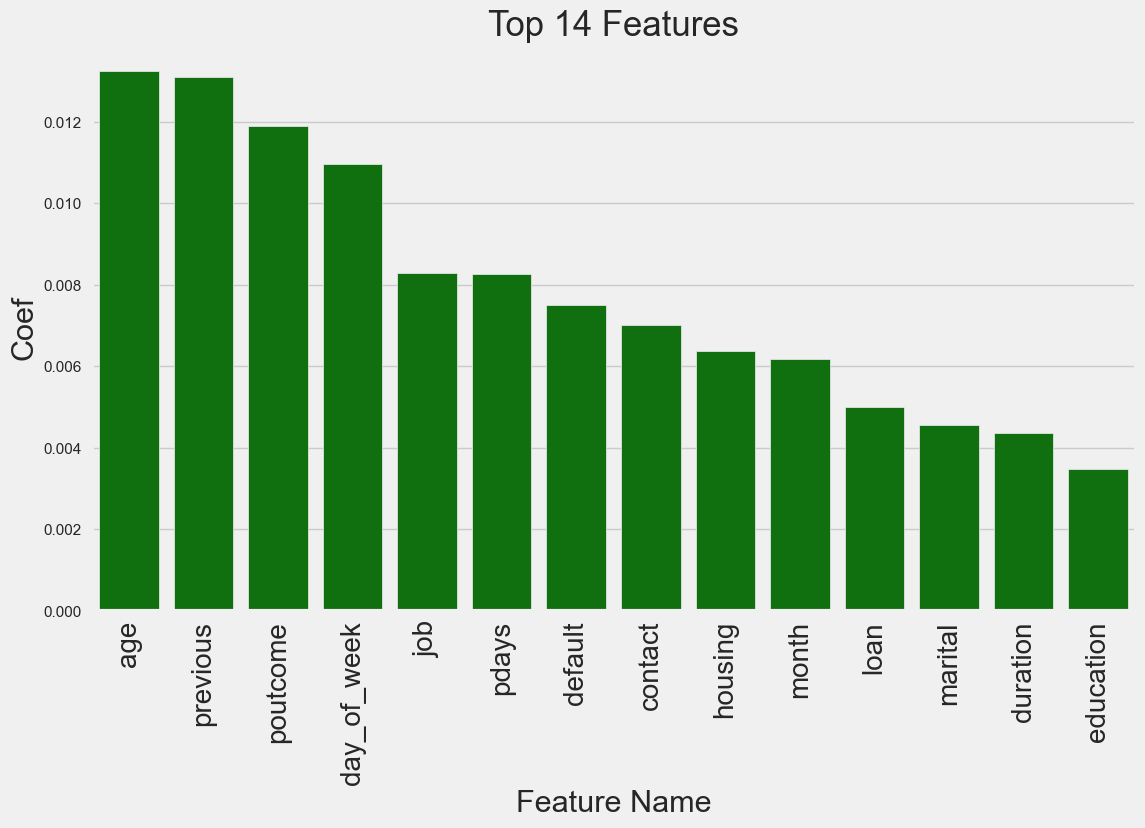

In [142]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df2.head(14),
           palette=df2.head(14)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 14 Features", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)

In [143]:
y_preds = random_forest_clf.predict(X_test)
print(f'Random Forest Model has a {random_forest_clf.score(X_test,y_test)*100:.2f}% Accuracy')

Random Forest Model has a 90.26% Accuracy


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

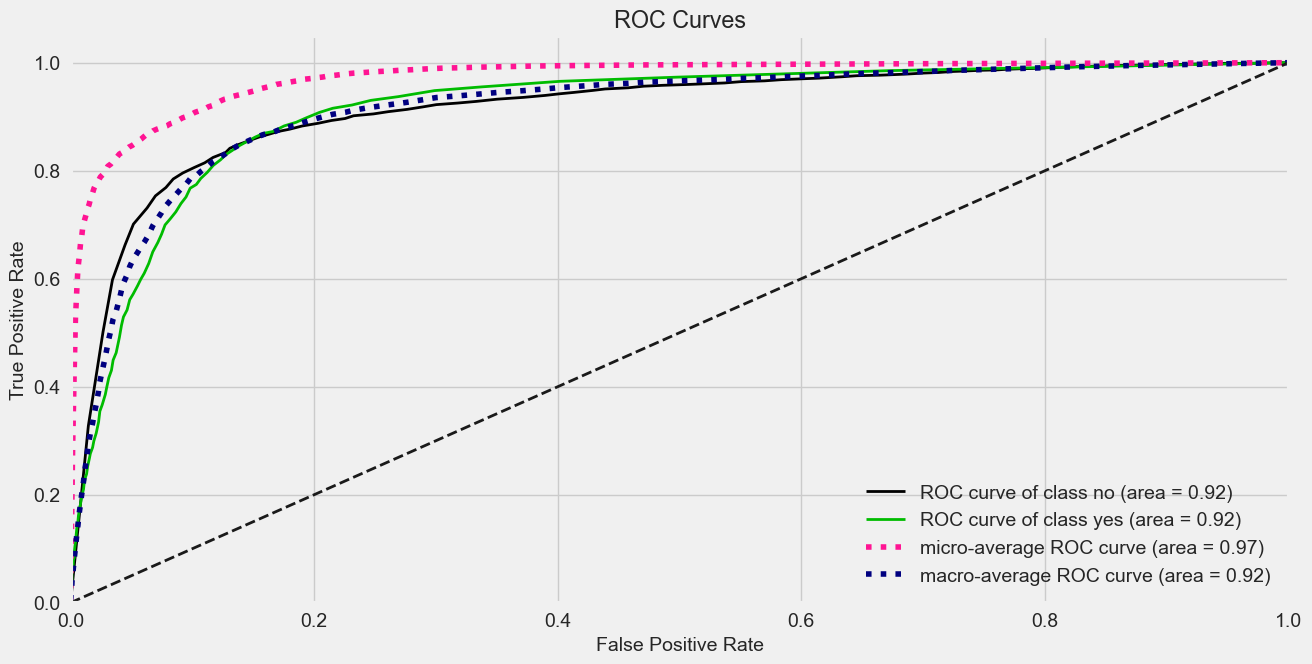

In [144]:
fig, ax = plt.subplots(figsize=(14,7))
y_prob = random_forest_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_prob,ax= ax,)

In [145]:
cr = classification_report(y_preds, y_test)
print(cr)

              precision    recall  f1-score   support

          no       0.97      0.92      0.95      9232
         yes       0.37      0.65      0.47       653

    accuracy                           0.90      9885
   macro avg       0.67      0.79      0.71      9885
weighted avg       0.93      0.90      0.91      9885



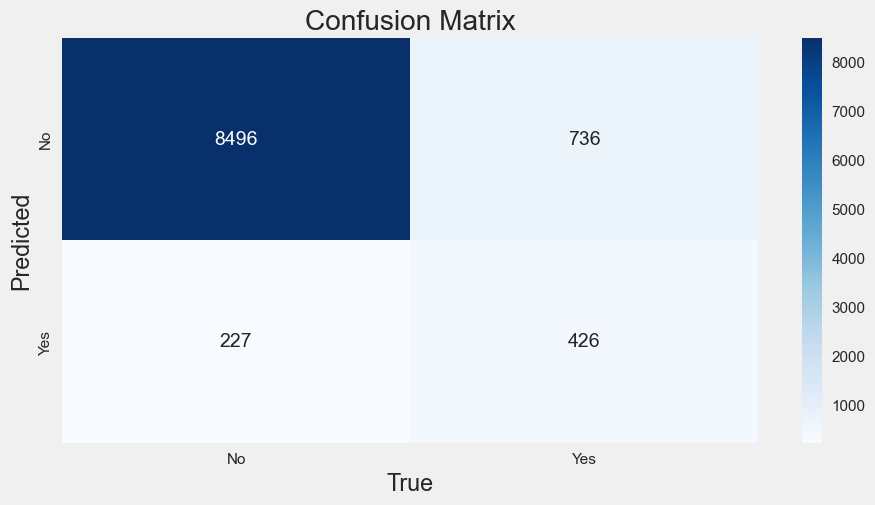

In [146]:
fig, ax = plt.subplots(figsize=(10, 5))
cm = confusion_matrix(y_preds, y_test)
sns.heatmap(cm, annot = True, fmt ='g', cmap = 'Blues',ax=ax)
ax.set_title('Confusion Matrix')
plt.xlabel ('True')
plt.ylabel ('Predicted')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes']);

### Support Vector Machine Model

In [147]:
svm_clf.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('train_cat_pipe',
                                                  Pipeline(steps=[('OneHotEncoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('train_int_pipe',
                                                  Pipeline(steps=[('sc',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                          

In [148]:
coefs = svm_clf.named_steps['svm'].coef_

In [149]:
y_preds = svm_clf.predict(X_test)
print(f'SVM Model has a {svm_clf.score(X_test,y_test)*100:.2f}% Accuracy')

SVM Model has a 89.39% Accuracy


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

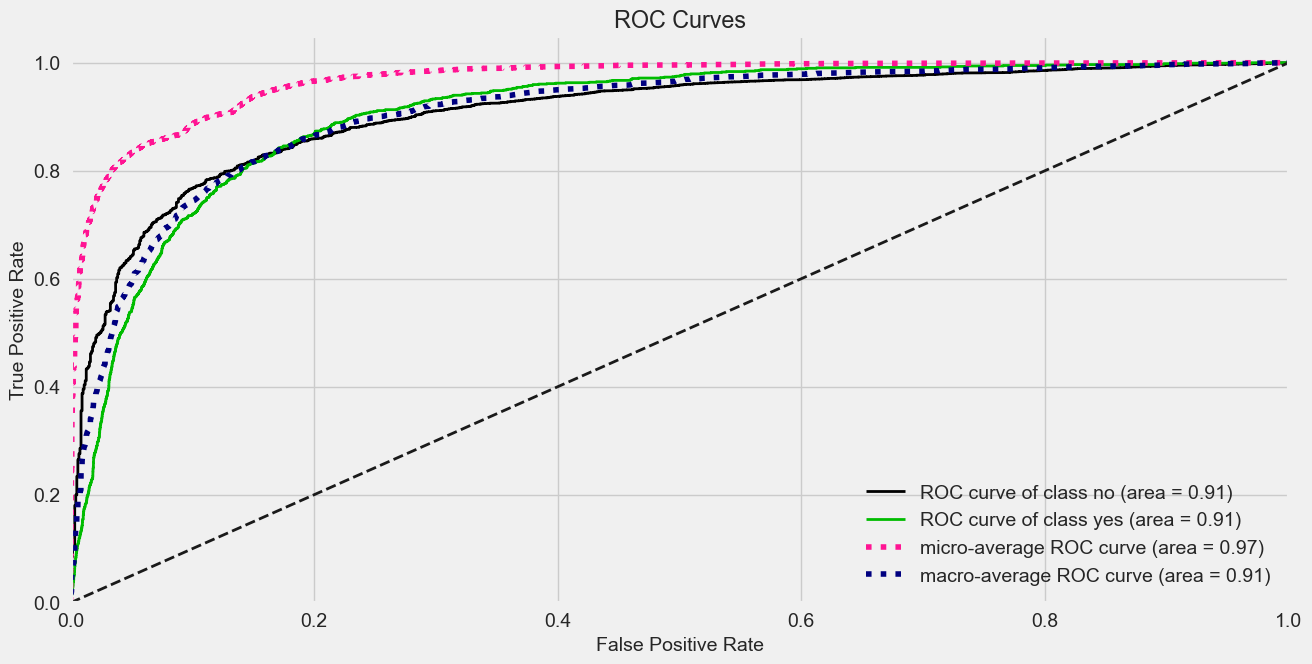

In [150]:
fig, ax = plt.subplots(figsize=(14,7))
y_prob = svm_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_prob,ax= ax,)

In [151]:
cr = classification_report(y_preds, y_test)
print(cr)

              precision    recall  f1-score   support

          no       0.98      0.90      0.94      9486
         yes       0.22      0.64      0.33       399

    accuracy                           0.89      9885
   macro avg       0.60      0.77      0.64      9885
weighted avg       0.95      0.89      0.92      9885



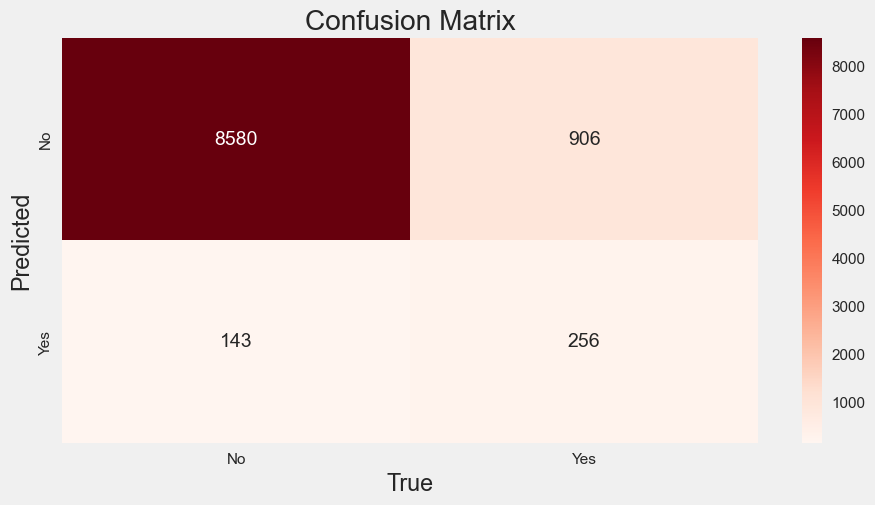

In [152]:
fig, ax = plt.subplots(figsize=(10, 5))
cm = confusion_matrix(y_preds, y_test)
sns.heatmap(cm, annot = True, fmt ='g', cmap = 'Reds',ax=ax)
ax.set_title('Confusion Matrix')
plt.xlabel ('True')
plt.ylabel ('Predicted')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes']);

### Logistic Regression Model 

In [153]:
logistic_clf.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('train_cat_pipe',
                                                  Pipeline(steps=[('OneHotEncoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('train_int_pipe',
                                                  Pipeline(steps=[('sc',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                          

In [154]:
coefs = logistic_clf.named_steps['lgr'].coef_.flatten()

In [155]:
zipped = zip(feature_names, coefs)
df3= pd.DataFrame(zipped, columns=["feature", "value"])
# Sort the features by the absolute value of their coefficient
df3["abs_value"] = df3["value"].apply(lambda x: abs(x))
df3["colors"] = df3["value"].apply(lambda x: "green" if x > 0 else "red")
df3 = df3.sort_values("abs_value", ascending=False)

Text(0.5, 0, 'Feature Name')

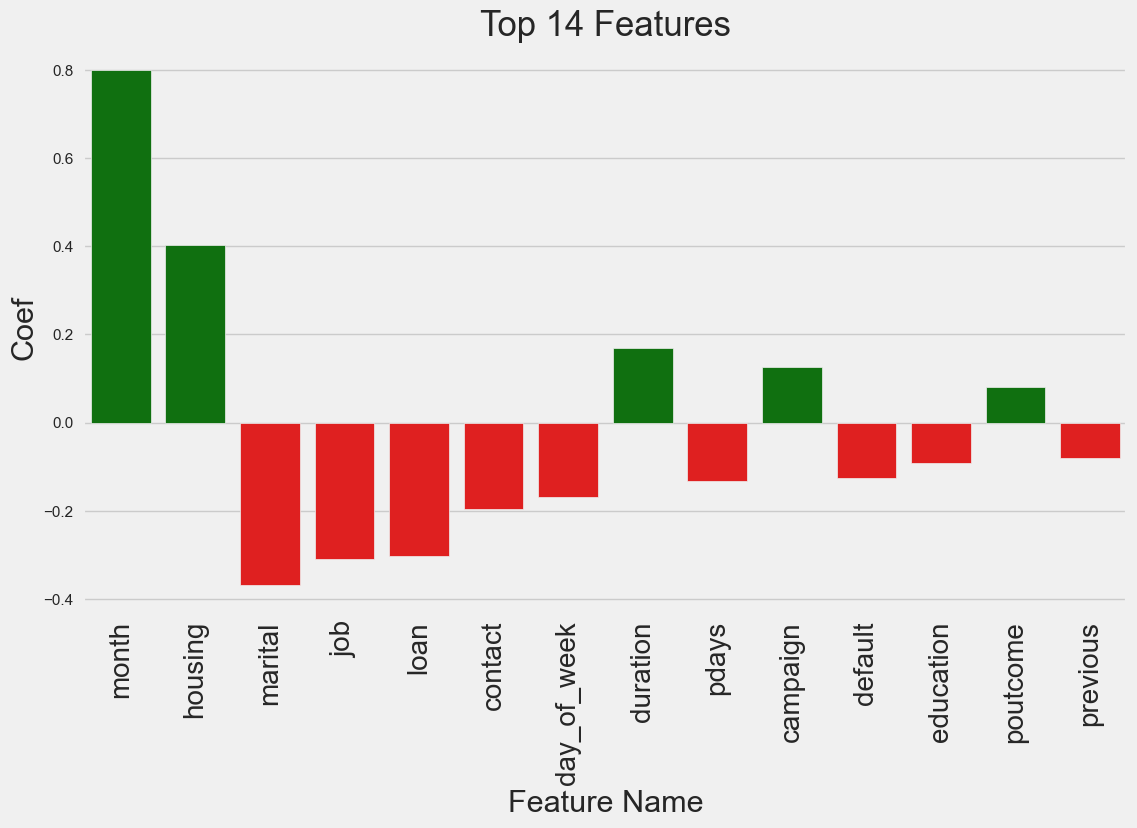

In [156]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df3.head(14),
           palette=df3.head(14)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 14 Features", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)

In [157]:
y_preds = logistic_clf.predict(X_test)
print(f'Logistc Regression Model has a {logistic_clf.score(X_test,y_test)*100:.2f}% Accuracy')

Logistc Regression Model has a 90.51% Accuracy


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

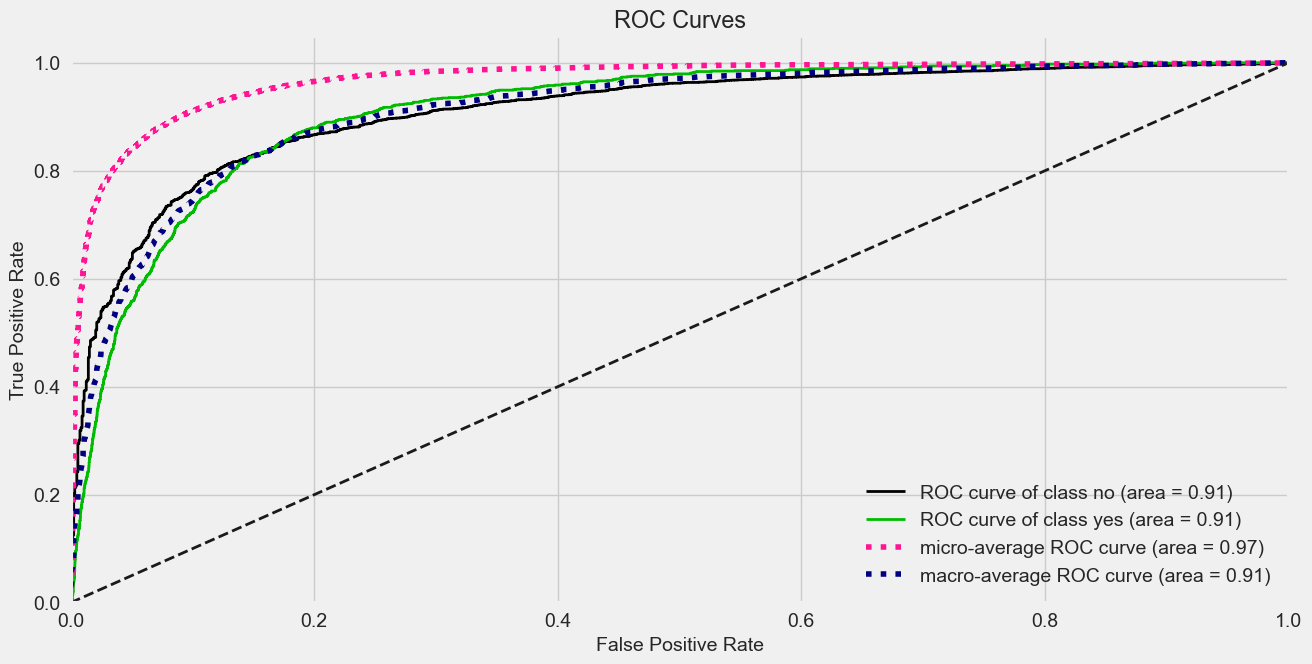

In [158]:
fig, ax = plt.subplots(figsize=(14,7))
y_prob = logistic_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_prob,ax= ax,)

In [159]:
cr = classification_report(y_preds, y_test)
print(cr)

              precision    recall  f1-score   support

          no       0.98      0.92      0.95      9233
         yes       0.38      0.67      0.48       652

    accuracy                           0.91      9885
   macro avg       0.68      0.80      0.72      9885
weighted avg       0.94      0.91      0.92      9885



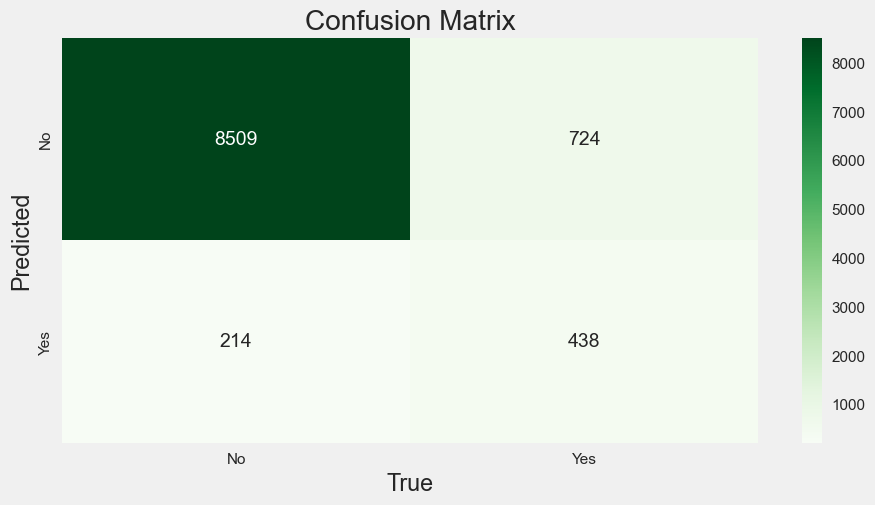

In [160]:
fig, ax = plt.subplots(figsize=(10, 5))
cm = confusion_matrix(y_preds, y_test)
sns.heatmap(cm, annot = True, fmt ='g', cmap = 'Greens',ax=ax)
ax.set_title('Confusion Matrix')
plt.xlabel ('True')
plt.ylabel ('Predicted')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes']);